In [4]:
import numpy as np
import matplotlib.pyplot as plt
import illustrisAPI.iApi as iApi
#iApi.headers['api-key']='cc4ff6392e79c9e08c158e5ae5493718'

In [5]:
iApi.setUnits('Zephyr')

In [6]:
masses=iApi.getSubhaloField('SubhaloMassType',simulation='Illustris-1')

In [9]:
snapInfo=iApi.getSimData(simulation='Illustris-1')
boxSize=1000*snapInfo['BoxSize']/snapInfo['h']
volume=boxSize**3

In [10]:
mDm=masses[:,1]
mStar=masses[:,4]
mBh=masses[:,5]

In [23]:
nBins=48
ms=np.zeros(nBins)
dStar=np.zeros(nBins)
dBh=np.zeros(nBins)
dDm=np.zeros(nBins)
for i in range(nBins):
    mLow=10**(6+0.25*i)
    mHigh=10**(6+0.25*(i+1))
    dm=mHigh-mLow
    ms[i]=10**(6+0.25*(i+0.5))
    stars=np.argwhere((mStar>mLow) & (mStar<mHigh))
    bhs=np.argwhere((mBh>mLow) & (mBh<mHigh))
    dms=np.argwhere((mDm>mLow) & (mDm<mHigh))
    dStar[i]=np.size(stars)/(volume*dm)
    dBh[i]=np.size(bhs)/(volume*dm)
    dDm[i]=np.size(dms)/(volume*dm)

In [33]:
#smbhData=np.genfromtxt('data/SMBHs.txt')
#smbhData[:,1]=smbhData[:,1]*1e-9

In [35]:
#np.savetxt('data/SMBHs.txt',smbhData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')

In [36]:
starData=np.vstack((ms[np.argmax(dStar):],dStar[np.argmax(dStar):])).T
dmData=np.vstack((ms[np.argmax(dDm):],dDm[np.argmax(dDm):])).T
bhData=np.vstack((ms[np.argmax(dBh):],dBh[np.argmax(dBh):])).T
np.savetxt('data/galaxies.txt',starData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')
np.savetxt('data/blackHoles.txt',bhData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')
np.savetxt('data/darkMatter.txt',dmData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')

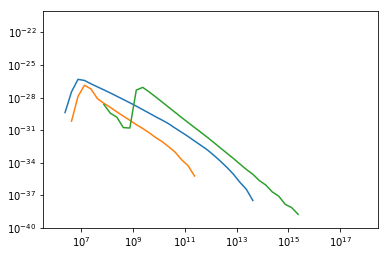

In [24]:
plot=plt.gca()
plot.plot(ms,dStar)
plot.plot(ms,dBh)
plot.plot(ms,dDm)
plot.set_xscale('log')
plot.set_yscale('log')
plot.set_ylim(1e-40,1e-20)
plt.show()